### Titanic Data Analysis

Analyzing the famous titanic data set.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import kaleido

In [6]:
#using the titanic dataset from the seaborn library
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


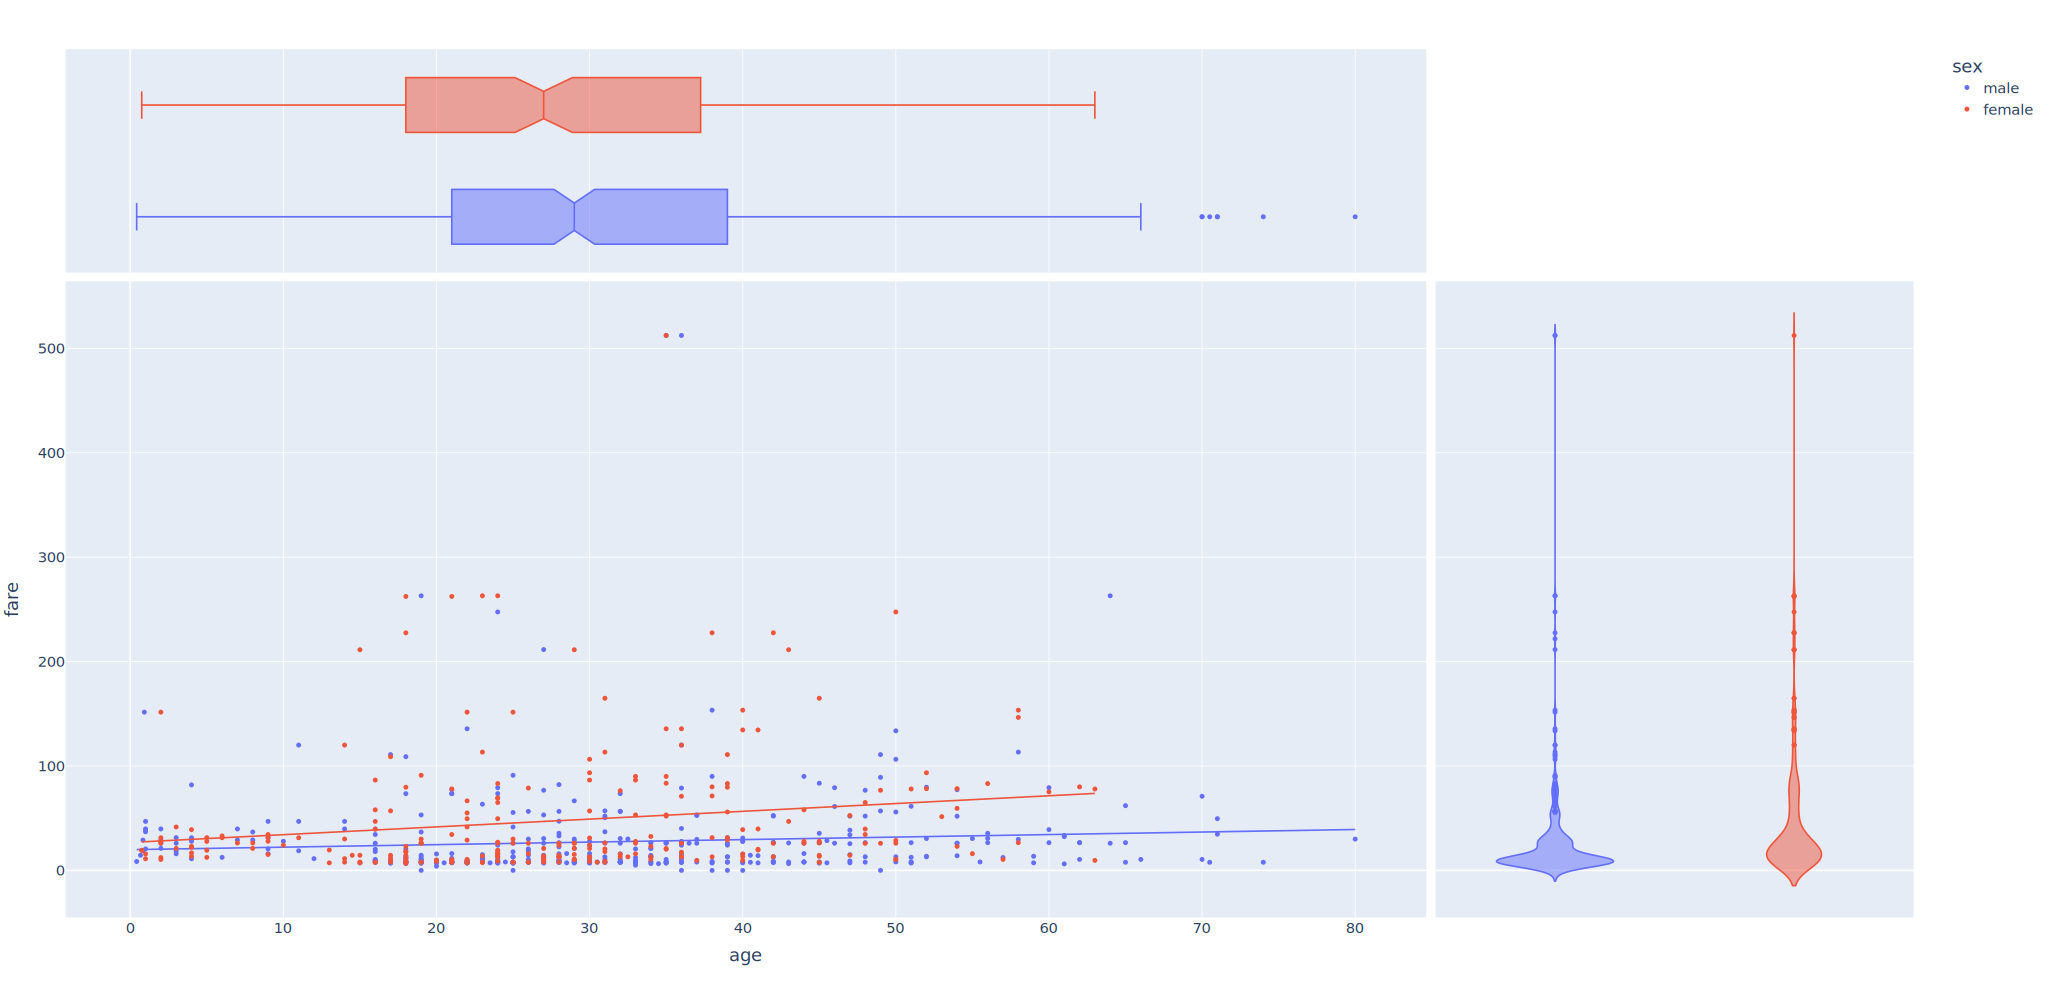

In [7]:
#using a scatter plot with boxplot and violin plot to quickly discern the differnces between age, sex and fare. 
#Female tend to be younger, pay more in fares. Maybe because older gentlemen had younger wives and bought more expensive tickets.
fig= px.scatter(df, 'age', 'fare', color='sex', marginal_y='violin', marginal_x='box', trendline='ols',width=2500,height=1200)
fig.update_layout(font=dict(size=18))
fig.show('svg')

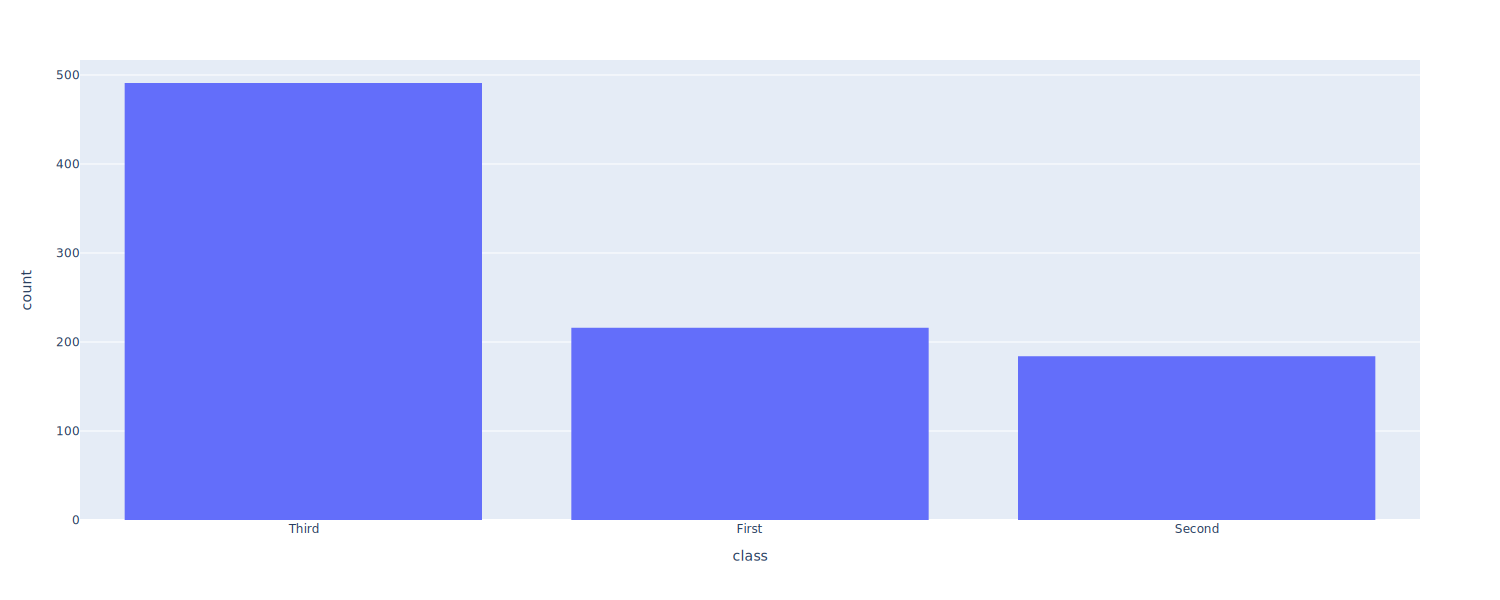

In [8]:
#how many passengers were in each class? Turns out more were in first than in second. 
fig= px.histogram(df, 'class', histfunc='count',width=1500,height=600)
fig.show('svg')


In [9]:
#distribution of man, woman and child. The children are roughly half male, half female while the split in adults is 2:1.
df[['who','sex']].value_counts()

who    sex   
man    male      537
woman  female    271
child  female     43
       male       40
Name: count, dtype: int64

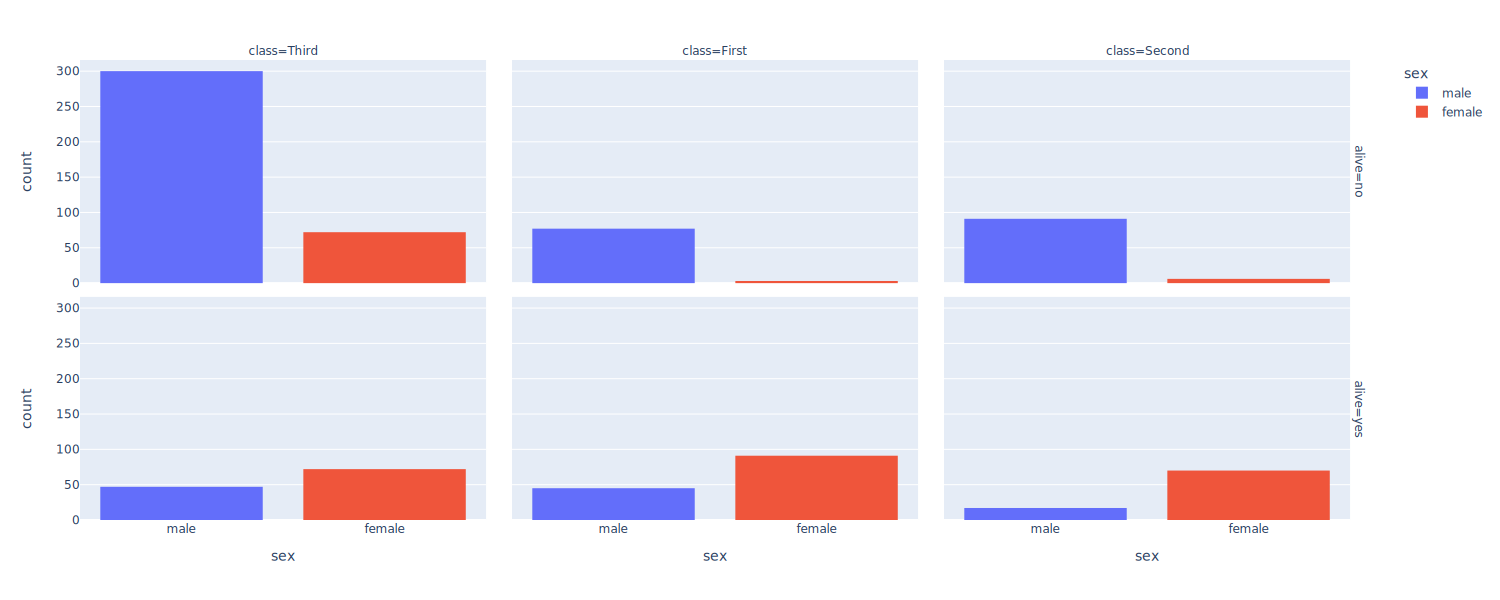

In [10]:
#comparing the survival count by class and sex. Top row shows dead people, bottom row alive ones. 
#Women have a higher survivor count across all classes. Even in third class the survival rate for women was 50%. Not even first class men had a rate this high. 
fig= px.histogram(df, x='sex', y='fare', facet_col='class', facet_row='alive', histfunc='count', color='sex',width=1500,height=600)
fig.show('svg')


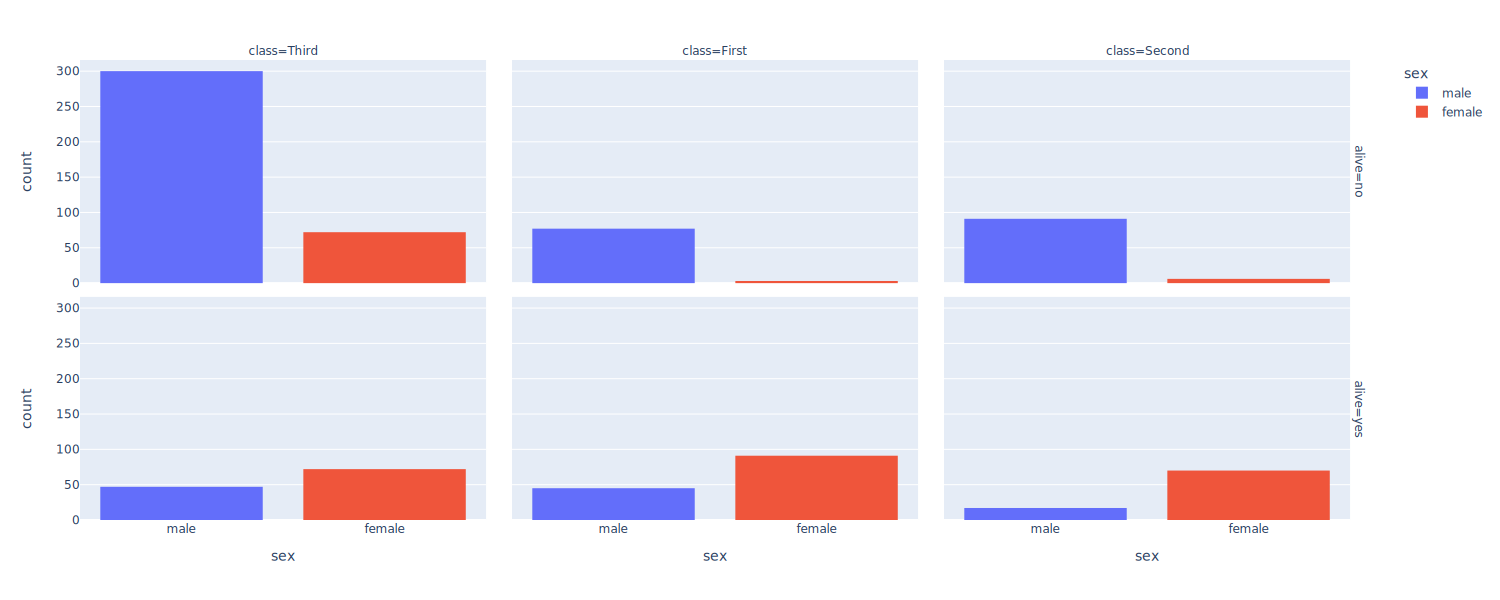

In [11]:
#fare paid shown by sex. The exctreme outlier squishes the boxplot together.
px.box(df, 'sex','fare', points='all',width=1500,height=600)
fig.show('svg')

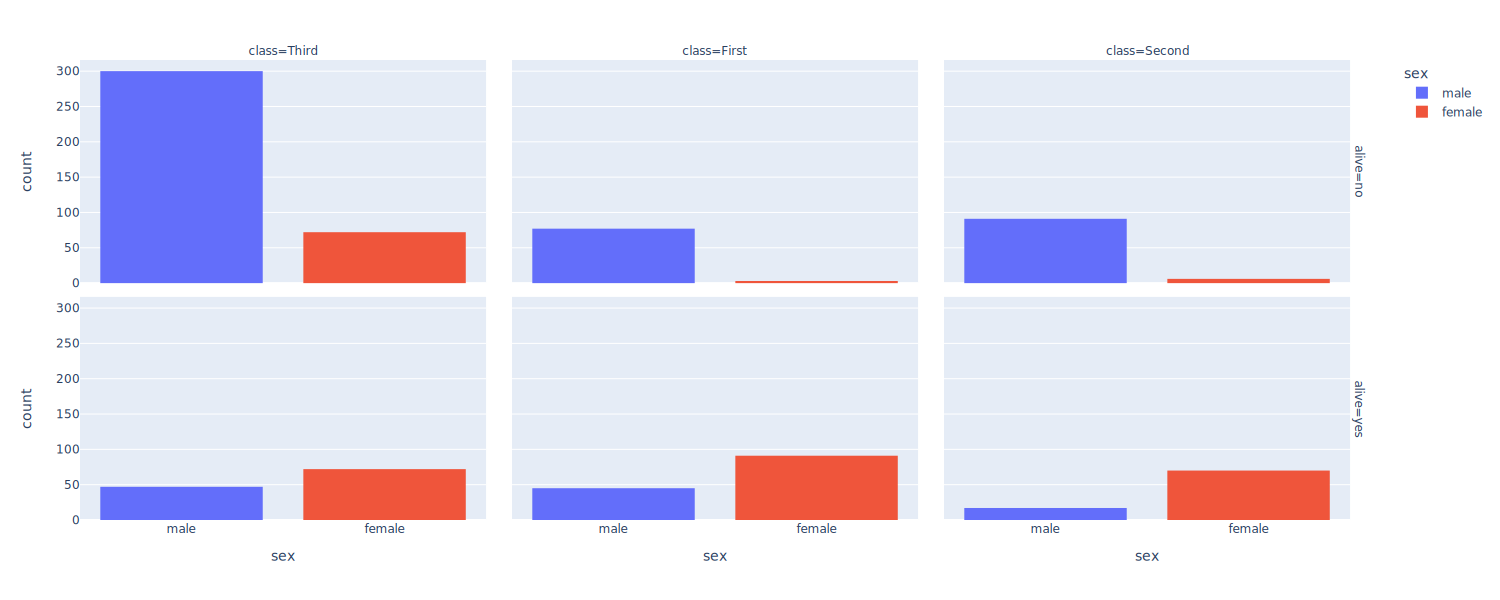

In [12]:
#does age have to anything with survival? For men it seems being a child was advantageous. 
#For women it tended to be the younger ones to die.
px.violin(df, y='age',x='alive',color='sex', points='all',violinmode='overlay',width=1500,height=600)
fig.show('svg')

In [13]:
#the same results are evidenced by the mean age of each survival group.
#Some explanations are that women and children were rescued first. This led to young males surviving and pulling the average down. 
# For the women it is likely the effect of the age difference between classes. Most women who died where in third class where the average age was the highest.
df.groupby(['sex','alive'])['age'].mean()

sex     alive
female  no       25.046875
        yes      28.847716
male    no       31.618056
        yes      27.276022
Name: age, dtype: float64

In [14]:
#mean age by class and sex
df.groupby(['sex','class'])['age'].mean()

sex     class 
female  First     34.611765
        Second    28.722973
        Third     21.750000
male    First     41.281386
        Second    30.740707
        Third     26.507589
Name: age, dtype: float64

In [15]:
#recounting the survival rate
df[['sex','alive']].value_counts()

sex     alive
male    no       468
female  yes      233
male    yes      109
female  no        81
Name: count, dtype: int64

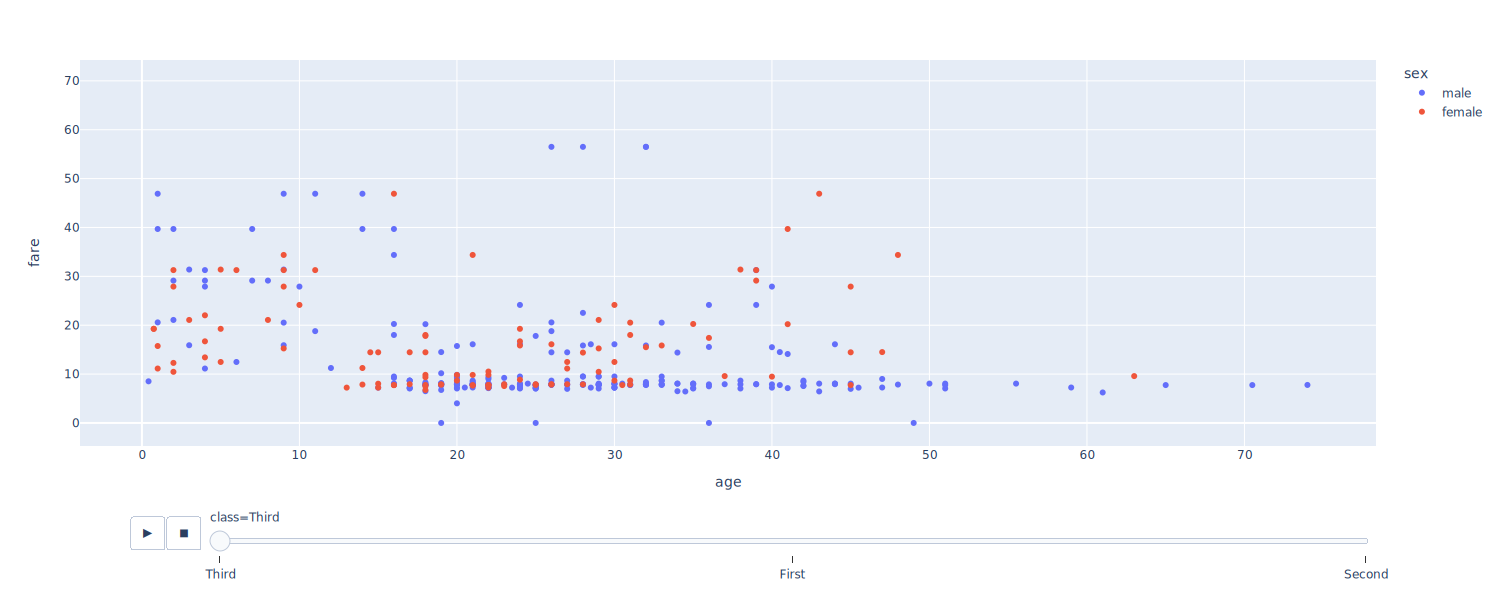

In [16]:
#playing around with the play axis
fig= px.scatter(df, 'age', 'fare', color='sex', animation_frame='class', width=1500,height=600)
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 1000
fig.show('svg')